In [2]:
import os
import pandas as pd
import env
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, password, host
database_url_base = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/'

# What should we market?
Ella Xu | Braeden Wright   

# Project Goal

### We are coming off of the worst end of year profits that we've had in four years, and are looking for a way to bounce back and finish the fiscal year strong.  With access to our previous data our goal is to review our past orders to determine what trends are present that we may wish to capitalize on, or possibly what opportunities we may be missing out on. 

### We will utilize three P's of marketing that are key indicators of a quality service. They are the product, price, and promotion of a good or service. With our data analysis, we will keep these in mind to determine what Product to market, what Prices best benefit the company, and what Promotion we may want to offer to improve our business going forward.

# Planning
* Setup repository environment (.gitignore, README.md)
* Import and test wrangle functions(aquire).
* Clean superstore data from Codeup mySQL database via wrangle.py(preperation)
* Explore data for trends and correlations amoung features(exploration)
* Ask and answer questions about the superstore data.(exploration)
* Visually represent findings with charts. (modeling/delivery)
* Report conclusions and next steps in a presentation.(delivering)


# Executive Summary


# Acquire the data

To acquire the superstore data, we built a function to pull the superstore_db using a SQL query.

In [4]:
df= wrangle.wrangle_superstore()
df.head(3)

Saving to .csv


,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,...,discount,profit,category_id,region_id,product name,category,sub_category,region_name,year,month
order_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-LA-10003223,...,0.2,4.2717,3,3,Avery 508,Office Supplies,Labels,Central,2014,1
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-BI-10004094,...,0.8,-5.4870,9,3,GBC Standard Plastic Binding Systems Combs,Office Supplies,Binders,Central,2014,1
2014-01-04,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Home Office,United States,Naperville,Illinois,60540.0,OFF-ST-10002743,...,0.2,-64.7748,5,3,SAFCO Boltless Steel Shelving,Office Supplies,Storage,Central,2014,1


# Data Wrangle

* Rename the columns to make it easy to read and code with.
                'Order ID': 'order_id',
                    'Order Date': 'order_date',
                    'Ship Date': 'ship_date',
                    'Customer ID': 'customer_id',
                    'Postal Code': 'zip_code',
                    'Category ID': 'category_id',
                    'Region ID': 'region_id',
                    'Region Name': 'region_name',
                    'Ship Mode': 'shipping_method',
                    'Sub-Category': 'sub_category'. 
                    
* convert the columns name to lower case. 
* convert the order_date to datetime datatype. 
* Added year as a column. 
* Added month as column. 
* Set order_date to index. 
* Download cleaned data to a .csv

# Data Exploration 

## Initial Questions
* How much did the store make and sell between 2014 and 2017?

* How was 2017 performance compared to previous years?

* Which was the most profitable category? Sub-Category?

* Overall Q4 Sales for the past three years? 

* What's the discount distribution and where are those discount being applied?

* What value can we add for customers that is marketable without hurting profits?


## How much did the store make and sell between 2014 and 2017?

In [14]:
#creating a pivot table to sum the sales and profit for each year. 
year_profit_sales=pd.pivot_table(data=df[['year','profit','sales']], 
                        index=['year'], 
                        values=['profit','sales'],
                        aggfunc='sum')
year_profit_sales

,profit,sales
year,,
2014,10041.2325,101075.5685
2015,10006.7669,92552.7542
2016,11225.3949,106836.2096
2017,6667.1350,96979.2931


<AxesSubplot:title={'center':'Year_performance'}, xlabel='category', ylabel='Maximum Sales'>

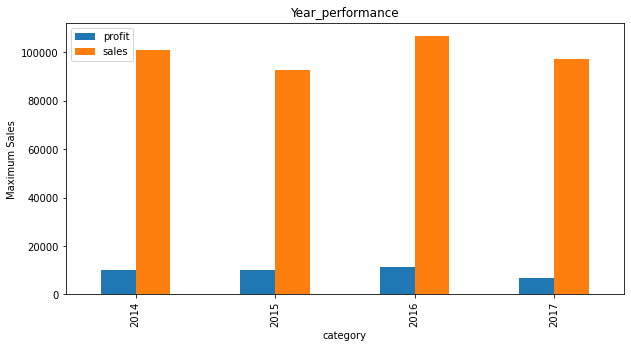

In [58]:
year_profit_sales.plot(kind='bar', title='Year_performance', ylabel='Maximum Sales',
         xlabel='category', figsize=(10, 5))
# Creating a bar plot to compare the profit vs sales. 

### Takeaways: looks like the sales and profit are not volitile, however 2017's profit has decreased, let's take a closer look. 

In [59]:
year_profit_sales.sales.pct_change()
# looked up the percertage change compare to the last year. The profit is going down.

year
2014         NaN
2015   -0.084321
2016    0.154328
2017   -0.092262
Name: sales, dtype: float64

In [18]:
# looked up the percertage change compare to the last year. 
year_profit_sales.profit.pct_change()

year
2014         NaN
2015   -0.003432
2016    0.121780
2017   -0.406067
Name: profit, dtype: float64

***Overall sales are not increasing or decreasing.***

<AxesSubplot:title={'center':'Month-to-Month Change in Sales'}, xlabel='Date By Month'>

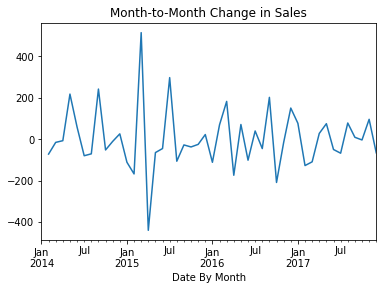

In [41]:
# Difference in sales
df.resample('M').sales.mean().diff().plot(title='Month-to-Month Change in Sales', xlabel='Date By Month')


***Takeaways:***

## Which was the most profitable sub-category? 

In [61]:
df_Category_profit = pd.pivot_table(data=df[['category','sub_category','profit','sales']], 
                        index=['category','sub_category'], 
                        values=['profit','sales'],
                        aggfunc='sum')

df_Category_profit
#create a category pivot table to show the most profitable category and 
#sub-category. 

profit       sales
category        sub_category                       
Furniture       Bookcases    -2267.7776  20280.1429
                Chairs        4306.3499  54409.2150
                Furnishings   2124.3447  16442.0180
                Tables       -4786.1621  48444.2095
Office Supplies Appliances    2776.4985  17415.0360
                Art           1336.4246   6346.8080
                Binders       4062.6403  28108.2820
                Envelopes     1394.5297   3349.8260
                Fasteners      215.6470    632.6640
                Labels        1544.5261   3415.5860
                Paper         5464.4993  12671.9140
                Storage       2771.6621  37373.6200
                Supplies      -253.9979   3109.9440
Technology      Accessories   7786.3621  30675.6040
                Copiers       5598.3914  14509.7220
                Machines      -680.6722  44215.5200
                Phones        6547.2634  56043.7140

<AxesSubplot:title={'center':'Category vs Maximum Sales'}, xlabel='category', ylabel='Maximum Sales'>

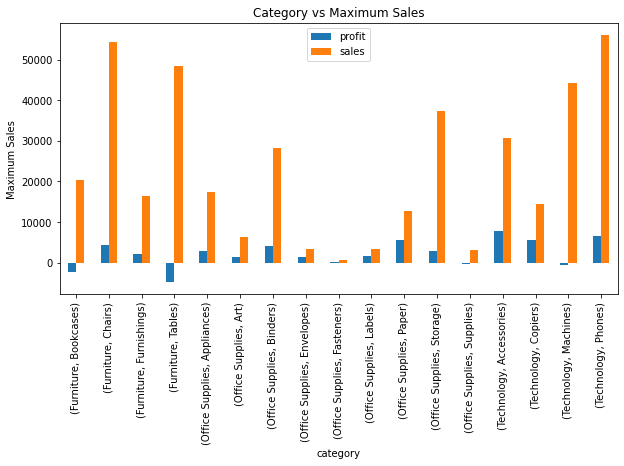

In [78]:
#Just polot all items and see if there are anyhing outstanding. 
df_Category_profit.plot(kind='bar', title='Category vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='category', figsize=(10, 5))

***Takeawys: looks like the accessories, coipers and phones, papers are top profitable items***

In [45]:
#We would look at the avg profit_per item_sold. 
Avg_profit_per_item_sold = (df.groupby('sub_category')['profit'].sum()) / (df.groupby('sub_category')['quantity'].sum())
Avg_profit_per_item_sold.sort_values(ascending=False).head()

sub_category
Copiers        180.593271
Accessories     16.357904
Chairs          11.702038
Phones          10.733219
Appliances      10.096358
dtype: float64

In [46]:
#We would like to see the popularity of each sub category. 
df.groupby('sub_category')['quantity'].sum().sort_values(ascending=False).head()

sub_category
Binders        1007.0
Paper           823.0
Furnishings     616.0
Phones          610.0
Storage         584.0
Name: quantity, dtype: float64

***Takeaways: When we look at the avg profit per item sold, we can see copiers and accessories are the top two sub categories. Surprise to find out that we have only sold 31 copiers but the profit per item are the top 1.***

## What item / discount is responsible for the dip in profit for 2017?

<AxesSubplot:xlabel='order_date'>

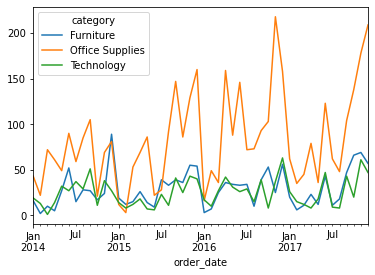

In [25]:
#df = df.set_index('order_date').sort_index()
   
df.groupby('category').resample('m').quantity.sum().unstack(0).plot()

***Takeways:Office supplies ***

## How was 2017 Q4 performance?

In [75]:
#Creating a subset for the year of 2017 Q4. 
oct_nov_dec_2017 = df[((df['month'] == 11) | (df['month'] == 12) | (df['month'] == 10))& (df['year'] == 2017)]

In [76]:
pd.pivot_table(data=oct_nov_dec_2017[['category','sub-category','discount','profit','sales']], 
                        index=['category','sub-category','discount'], 
                        values=['profit','sales'],
                        aggfunc='sum')
# creating the pivot table to see id there any categories that are lossing money. 

profit      sales
category        sub-category discount                      
Furniture       Bookcases    0.15         4.2882  1764.3280
                             0.20        16.9172   515.1200
                             0.32       -11.5960    78.8528
                Chairs       0.00       226.9644   872.9400
                             0.10       575.7010  3362.1300
                             0.20       -67.7057  2848.5040
                             0.30       -27.2840   318.2900
                Furnishings  0.00       426.0018  1272.1800
                             0.20        92.0865  1896.2880
                             0.60       -19.8178    25.7000
                Tables       0.00       116.8720  1669.6000
                             0.20      -112.9527  1004.0240
                             0.40      -695.4264  2349.6840
                             0.50      -604.7148   938.1700
Office Supplies Appliances   0.00      1323.0513  4552.7600
                             0.20        18.1556   198.5920
                             0.80      -203.6754    75.6080
                Art          0.00       134.7135   407.2700
                             0.20        26.7015   312.2320
                Binders      0.00       289.7814   613.6200
                             0.20       290.6189   861.6720
                             0.70       -38.7557    56.8890
                             0.80       -34.0224    19.5840
                Envelopes    0.00         7.4872    15.2800
                             0.20        21.5910    57.5760
                Fasteners    0.00        24.0523    69.2100
                             0.20         2.5707    10.8240
                Labels       0.00        77.6544   163.2100
                             0.20        20.9670    58.9600
                Paper        0.00       289.9117   609.6000
                             0.20       131.9049   410.7280
                Storage      0.00       653.8787  2996.5200
                             0.20         2.0843  1803.9840
                Supplies     0.20         0.5004     6.6720
Technology      Accessories  0.00       340.4027   953.9400
                             0.20       -15.0187   328.2640
                Copiers      0.20       434.9913  1199.9760
                Machines     0.50     -3839.9904  7999.9800
                             0.70       -63.9960    95.9940
                Phones       0.00        45.5906   398.6900
                             0.20       333.4246  3092.0560
                             0.40       -81.2348   650.2680

In [39]:
df.loc['2017-11-28']

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,...,category_id,region_id,product name,category,sub_category,region_name,year,month,discount_bin,discount_level
order_date,,,,,,,,,,,,,,,,,,,,,
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,FUR-FU-10000576,...,6,4,Luxo Professional Fluorescent Magnifier Lamp w...,Furniture,Furnishings,East,2017,11,low,0-20
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,FUR-TA-10004154,...,4,4,"Riverside Furniture Oval Coffee Table, Oval En...",Furniture,Tables,East,2017,11,high,0-20
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,FUR-FU-10003601,...,6,4,"Deflect-o RollaMat Studded, Beveled Mat for Me...",Furniture,Furnishings,East,2017,11,low,0-20
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,OFF-PA-10000788,...,11,4,Xerox 210,Office Supplies,Paper,East,2017,11,low,0-20
2017-11-28,US-2017-110576,2017-12-02,Standard Class,RB-19795,Home Office,United States,Philadelphia,Pennsylvania,19120.0,OFF-PA-10002479,...,11,4,Xerox 4200 Series MultiUse Premium Copy Paper ...,Office Supplies,Paper,East,2017,11,low,0-20


***Takeaway:*** 

In [40]:
df.loc['2017-11-04']

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,...,category_id,region_id,product name,category,sub_category,region_name,year,month,discount_bin,discount_level
order_date,,,,,,,,,,,,,,,,,,,,,
2017-11-04,US-2017-168116,2017-11-04,Same Day,GT-14635,Corporate,United States,Burlington,North Carolina,27217.0,OFF-AP-10002457,...,10,1,Eureka The Boss Plus 12-Amp Hard Box Upright V...,Office Supplies,Appliances,South,2017,11,low,0-20
2017-11-04,CA-2017-105144,2017-11-11,Standard Class,SZ-20035,Home Office,United States,Grand Prairie,Texas,75051.0,OFF-LA-10003923,...,3,3,Alphabetical Labels for Top Tab Filing,Office Supplies,Labels,Central,2017,11,low,0-20
2017-11-04,US-2017-156083,2017-11-11,Standard Class,JL-15175,Home Office,United States,Columbia,Tennessee,38401.0,OFF-PA-10001560,...,11,1,"Adams Telephone Message Books, 5 1/4” x 11”",Office Supplies,Paper,South,2017,11,low,0-20
2017-11-04,US-2017-168116,2017-11-04,Same Day,GT-14635,Corporate,United States,Burlington,North Carolina,27217.0,TEC-MA-10004125,...,16,1,Cubify CubeX 3D Printer Triple Head Print,Technology,Machines,South,2017,11,high,20-40


***Takeaway:*** 

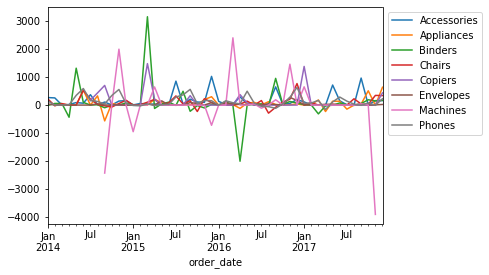

In [49]:
the_list = df[df['sub_category'] != 'Paper']
the_list = the_list[the_list['sub_category'] != 'Supplies']
the_list = the_list[the_list['sub_category'] != 'Bookcases']
the_list = the_list[the_list['sub_category'] != 'Fasteners']
the_list = the_list[the_list['sub_category'] != 'Tables']
the_list = the_list[the_list['sub_category'] != 'Labels']
the_list = the_list[the_list['sub_category'] != 'Art']
the_list = the_list[the_list['sub_category'] != 'Storage']
the_list = the_list[the_list['sub_category'] != 'Furnishings']
the_list.groupby('sub_category').resample('m').profit.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

***Takeaways***

## Overall Q4 Sales for the past three years. 

In [48]:
#only get the subset for every year's Q4. 
oct_nov_dec = df[(df['month'] == 11) | (df['month'] == 12)|(df['month'] == 10)]
oct_nov_dec.head(3)

,order_id,ship_date,shipping_method,customer_id,segment,country,city,state,zip_code,product id,...,category_id,region_id,product name,category,sub_category,region_name,year,month,discount_bin,discount_level
order_date,,,,,,,,,,,,,,,,,,,,,
2014-10-03,CA-2014-153976,2014-10-08,Second Class,BP-11290,Consumer,United States,Evanston,Illinois,60201.0,FUR-CH-10002880,...,2,3,"Global High-Back Leather Tilter, Burgundy",Furniture,Chairs,Central,2014,10,high,0-20
2014-10-06,CA-2014-134677,2014-10-10,Standard Class,XP-21865,Consumer,United States,San Diego,California,92024.0,TEC-AC-10001445,...,12,2,Imation USB 2.0 Swivel Flash Drive USB flash d...,Technology,Accessories,West,2014,10,low,NaN
2014-10-07,CA-2014-117429,2014-10-13,Standard Class,MR-17545,Home Office,United States,Philadelphia,Pennsylvania,19140.0,FUR-FU-10000222,...,6,4,"Seth Thomas 16"" Steel Case Clock",Furniture,Furnishings,East,2014,10,low,0-20


In [90]:
#create the pivot table
oct_nov_dec = nov_dec.groupby('year', as_index=False).agg({'sales': sum,
                                                         'profit': sum,})

In [91]:
oct_nov_dec

,year,sales,profit
0,2014,36294.9195,5237.9934
1,2015,30874.6652,1723.0218
2,2016,31531.1040,6097.0994
3,2017,46935.7698,112.6743


In [92]:
oct_nov_dec.pct_change()

,year,sales,profit
0,NaN,NaN,NaN
1,0.000497,-0.149339,-0.671053
2,0.000496,0.021261,2.538608
3,0.000496,0.488555,-0.981520


***Sales in Q4 keep increasing for two years.Compare to 2016, 2017's sales increased 48%***

## What's the discount distribution and where are those discount being applied? 

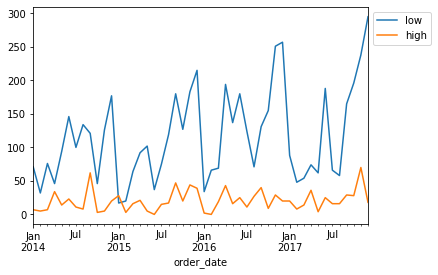

In [27]:
df['discount_bin'] = pd.qcut(df.discount, 2, labels=['low', 'high'])
df.groupby('discount_bin').resample('m').quantity.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))


***Takeaways***

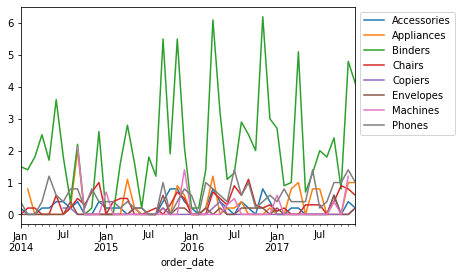

In [50]:
the_list.groupby('sub_category').resample('m').discount.sum().unstack(0).plot()
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

***Takeaways***

# Conclusion 

# Key Findings From Exploration

# Recommendation

Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.


# Next Step